In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy import linalg
import time

import sys
sys.path.insert(0, '..')
import specsens as ss

---- Simulation parameter ----
Generations:    300
Iterations:     300
Total Iters:    90000
Signal power:   0.00 dB
Noise power:    13.00 dB
SNR:            -13.00 dB
Signal length:  0.001024 sec
Signal samples: 1024
---- Simulation stats theory ----
Prob false alarm 0.1000
Prob detection   0.6145
Threshold        21253.8895
---- Running simulation ----
   infs left at  0.00%
 52.04s left at  0.33%
 48.98s left at  0.67%
 50.35s left at  1.00%
 48.18s left at  1.33%
 49.70s left at  1.67%
 47.74s left at  2.00%
 50.19s left at  2.33%
 47.67s left at  2.67%
 48.16s left at  3.00%
 47.38s left at  3.33%
 53.50s left at  3.67%
 49.14s left at  4.00%
 46.93s left at  4.33%
 46.55s left at  4.67%
 47.61s left at  5.00%
 46.31s left at  5.33%
 46.67s left at  5.67%
 46.10s left at  6.00%
 46.49s left at  6.33%
 45.63s left at  6.67%
 46.75s left at  7.00%
 45.48s left at  7.33%
 45.87s left at  7.67%
 50.11s left at  8.00%
 45.25s left at  8.33%
 44.55s left at  8.67%
 45.53s left at  9.00%

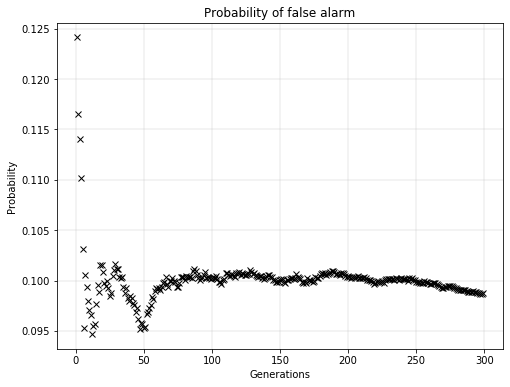

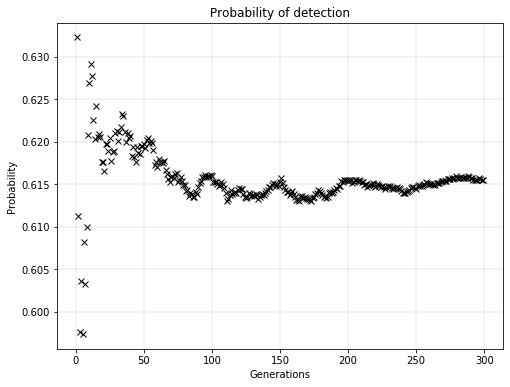

In [2]:
# def simulation(gens=100,
#                itrs=100,
#                f_sample=1e6,
#                signal_strength=0.,
#                noise_strength=0.,
#                length_sec=None,
#                num_samples=None,
#                theo_pfa=0.1,
#                threshold=None,
#                noise_un=0.):

#     # Check and calculate length, in seconds and number of samples
#     if num_samples is not None:
#         assert num_samples > 0., 'num_samples must be greater than 0'
#         length_sec = num_samples / f_sample
#     elif length_sec is not None:
#         assert length_sec > 0., 'length_sec must be greater than 0'
#         length_sec = length_sec
#         num_samples = int(f_sample * length_sec)
#     else:
#         assert False, 'either num_samples or length_sec needed'

#     # Calculate threshold
#     if threshold is None:
#         threshold = ss.chi2_stats.get_thr(noise_power=noise_strength,
#                                           pfa=theo_pfa,
#                                           n=num_samples,
#                                           dB=True)

#     print('---- Simulation parameter ----')
#     print('Generations:    %d' % (gens))
#     print('Iterations:     %d' % (itrs))
#     print('Total Iters:    %d' % (gens * itrs))
#     print('Signal power:   %.2f dB' % (signal_strength))
#     print('Noise power:    %.2f dB' % (noise_strength))
#     print('SNR:            %.2f dB' % (signal_strength - noise_strength))
#     print('Signal length:  %.6f sec' % (length_sec))
#     print('Signal samples: %d' % (num_samples))

#     theo_pd = ss.chi2_stats.get_pd(noise_strength,
#                                    signal_strength,
#                                    threshold,
#                                    num_samples,
#                                    dB=True)
#     print('---- Simulation stats theory ----')
#     print('Prob false alarm %.4f' % (theo_pfa))
#     print('Prob detection   %.4f' % (theo_pd))
#     print('Threshold        %.4f' % (threshold))

#     print('---- Running simulation ----')

#     pfas = list()  # Probability of false alarm list
#     pds = list()  # Probability of detection list
#     current_time = None

#     # Outer generations loop
#     for i in range(gens):

#         # Create new signal objects for every generation loop
#         wm = ss.WirelessMicrophone(f_sample=f_sample, t_sec=length_sec)
#         wgn = ss.WhiteGaussianNoise(f_sample=f_sample, t_sec=length_sec)
        
#         # Add noise uncertainty
#         noise_strength += np.random.uniform(-noise_un, noise_un)
        
#         # Run itertations and store results in result array
#         result = np.array([])
#         for j in range(itrs):
#             result = np.append(result, iteration(wm, wgn, signal_strength, noise_strength, threshold))
        
#         # Collect results from result array
#         unique, counts = np.unique(result, return_counts=True)
#         result = dict(zip(unique, counts))
        
#         # Compute stats and store in list
#         pfa_tmp = result[3] / (result[3] + result[4])
#         pd_tmp = result[1] / (result[1] + result[2])
#         pfas.append(pfa_tmp)
#         pds.append(pd_tmp)

#         # Print simulation progress
#         rem, percent, current_time = runtime_stats(current_time, gens, i)
#         print('%6.2fs left at %5.2f%%' % (rem, percent))

#     # Compute stats from lists
#     pfa = np.sum(pfas) / gens
#     pd = np.sum(pds) / gens

#     print('---- Simulation stats ----')
#     print('Prob false alarm theory %.4f' % (theo_pfa))
#     print('Prob false alarm sim    %.4f' % (pfa))
#     print('Prob detection theory   %.4f' % (theo_pd))
#     print('Prob detection sim      %.4f' % (pd))

#     print_convergence(gens, pfas, pds)
#     return pfa, pd


# def iteration(wm, wgn, signal_strength, noise_strength, threshold):

#     # Generate signal, center frequency does not matter with single band ED
#     sig = wm.get_soft(f_center=1e5, power=signal_strength, dB=True)

#     # Generate noise
#     noise = wgn.get_signal(power=noise_strength,
#                            dB=True)

#     # Randomly decide whether signal should be present
#     sig_present = bool(np.random.randint(2))
#     if sig_present:
#         both = sig + noise
#     else:
#         both = noise

#     # Classic (single band) energy detector
#     eng = ss.EnergyDetector.get(both)

#     # Threshold
#     sig_detected = eng > threshold

#     # Log signal and detection outcome
#     if sig_present and sig_detected:
#         return 1
#     elif sig_present and not sig_detected:
#         return 2
#     elif not sig_present and sig_detected:
#         return 3
#     else:
#         return 4

# def runtime_stats(current_time, total_itr, current_itr):
#     if current_time is None:  # First iteration cant predict time
#         current_time = time.time()
#         return float('inf'), 0.0, current_time
#     delta_time = time.time() - current_time
#     current_time = time.time()
#     remaining_itr = total_itr - current_itr
#     remaining_time = delta_time * remaining_itr
#     percent_done = current_itr / total_itr * 100.0
#     return remaining_time, percent_done, current_time


# def print_convergence(gens, pfas, pds):
#     plt.figure(figsize=(8, 6))
#     plt.title('Probability of false alarm')
#     plt.grid(linewidth=0.3)
#     for i in range(1, gens):
#         inter = np.sum(pfas[0:i]) / i
#         plt.plot(i, inter, 'kx')
#     plt.xlabel('Generations')
#     plt.ylabel('Probability')
#     plt.show()
#     plt.figure(figsize=(8, 6))
#     plt.title('Probability of detection')
#     plt.grid(linewidth=0.3)
#     for i in range(1, gens):
#         inter = np.sum(pds[0:i]) / i
#         plt.plot(i, inter, 'kx')
#     plt.xlabel('Generations')
#     plt.ylabel('Probability')
#     plt.show()

_ = ss.sim_narrow(gens=300,
           itrs=300,
           f_sample=1e6, # in Hz
           signal_strength=0.0, # in dB
           noise_strength=13.0, # in dB
           length_sec=0.001024, # in seconds
           theo_pfa=0.1,
           noise_un=0.0)